# Sentiment Analysis (センチメント分析)

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
   

- 言語学者が全ての単語についてセンチメントスコアを付けたものを利用する．
- "not great"と"great"は意味全く異なるので，単語の順番が大事．単語文書行列ではなくコーパスデータをそのまま使う．
- 大量のデータから深層学習などを使って単語のスコア（埋め込み：embedding）を得る方法が最近の主流．(Getting a Documet-term matrix for a plethora of data is impractical, so instead project that sparse matrix onto a lower dimensional, higher density vector for learning)

In [8]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,article
20211025_13,Japan's wedding industry is enduring tough tim...
20211025_08,The Tokyo Metropolitan Government has lifted a...
20211025_04,Russia's first and second largest cities of Mo...
20211024_11,The government of Singapore will make COVID-19...
20211024_13,Around 130 elementary school students took par...
20211022_32,The Tokyo Metropolitan Government has opened t...


In [10]:
# Create quick lambda functions to find the polarity and subjectivity of each routine

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['article'].apply(pol)
data['subjectivity'] = data['article'].apply(sub)
data

,article,polarity,subjectivity
20211025_13,Japan's wedding industry is enduring tough tim...,0.060185,0.361111
20211025_08,The Tokyo Metropolitan Government has lifted a...,0.150253,0.316351
20211025_04,Russia's first and second largest cities of Mo...,0.040249,0.366623
20211024_11,The government of Singapore will make COVID-19...,0.022273,0.323601
20211024_13,Around 130 elementary school students took par...,0.078846,0.407051
20211022_32,The Tokyo Metropolitan Government has opened t...,0.035472,0.243137


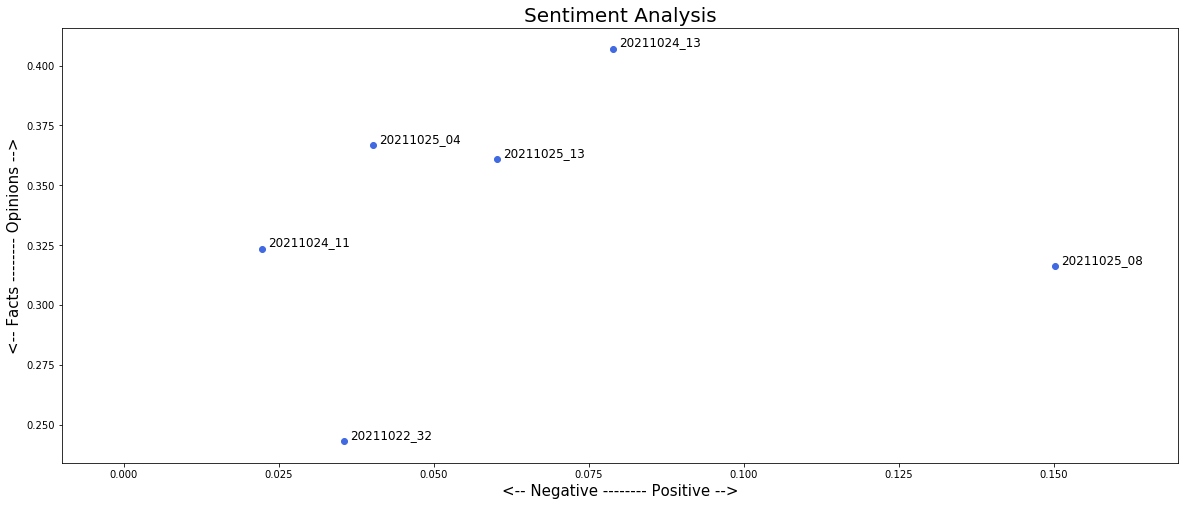

In [20]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]

for index, article in enumerate(data.index):
    x = data.polarity.loc[article]
    y = data.subjectivity.loc[article]
    plt.scatter(x, y, color = 'royalblue')
    plt.text(x + .001, y +.001, data.index[index], fontsize=12)
    plt.xlim(-.01, .17) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()